# Sprint 1

In [102]:
import utils
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
df = utils.import_attrition_data()
df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-,15634602,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,-,15647311,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,-,15619304,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,-,15701354,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,-,15737888,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,-,15606229,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,-,15569892,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,-,15584532,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,-,15682355,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1


# AT09

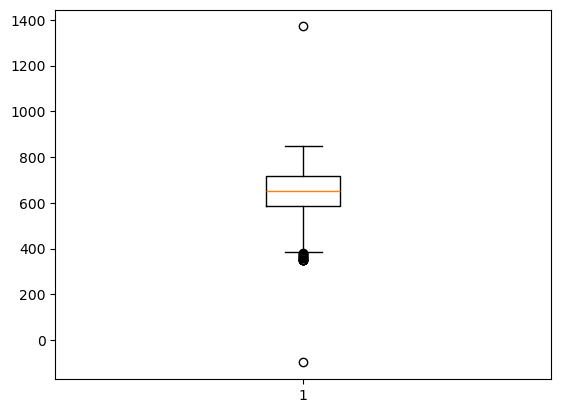

In [104]:
fig, ax = plt.subplots()

VP = ax.boxplot(df["credit_score"])

plt.show()

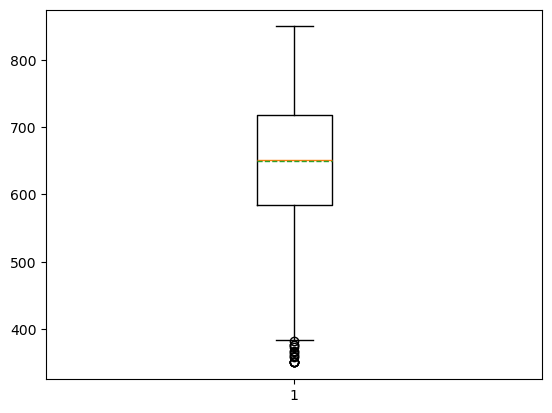

In [105]:
median = df["credit_score"].median()

df.loc[df["credit_score"] < 0, "credit_score"] = median
df.loc[df["credit_score"] > 1000, "credit_score"] = median

df

plt.boxplot(df["credit_score"], showmeans=True, meanline=True)
plt.show()

# AT10

<Axes: title={'center': 'balance'}, xlabel='country'>

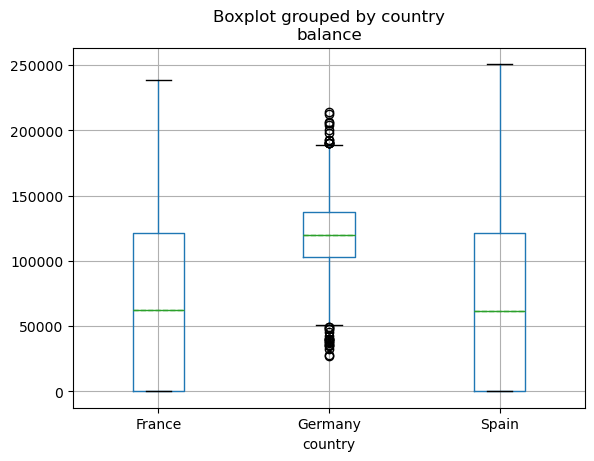

In [106]:
df.boxplot(column="balance", by="country", showmeans=True, meanline=True)

# AT11

<Axes: xlabel='credit_score', ylabel='balance'>

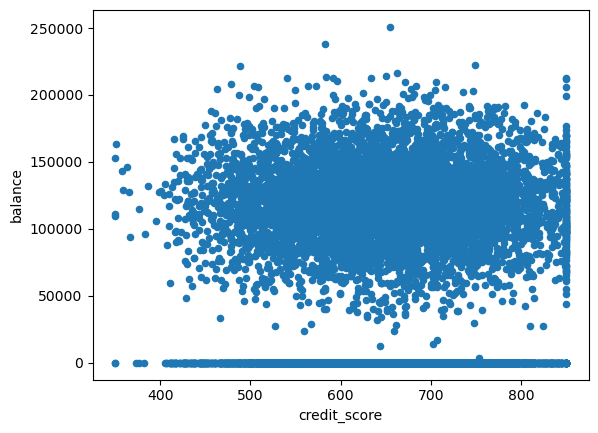

In [107]:
df.dropna(subset="balance").plot.scatter(x="credit_score", y="balance")

In [108]:
df.isna().sum()

num_kids            0
customer_id         0
credit_score        0
country             0
gender              1
age                 0
tenure              0
balance             0
products_number     0
credit_card         3
active_member       0
estimated_salary    0
churn               0
dtype: int64

# AT12

<Axes: title={'center': 'age'}, xlabel='churn', ylabel='Age'>

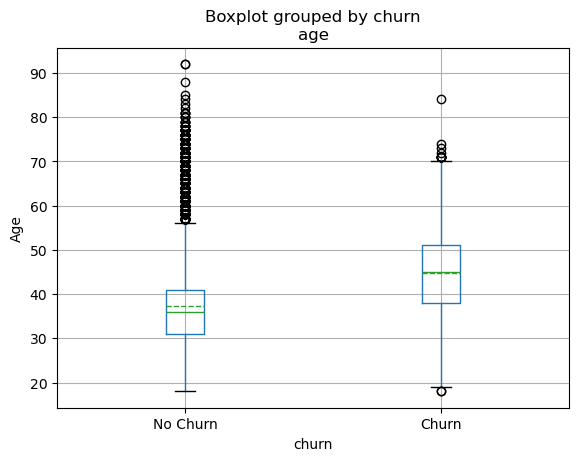

In [109]:
boxplot = df.boxplot(column="age", by="churn", showmeans=True, meanline=True)

boxplot.set_ylabel("Age")
boxplot.set_xticklabels(["No Churn", "Churn"])

boxplot


# AT13

<Axes: title={'center': 'balance'}, xlabel='churn', ylabel='Balance'>

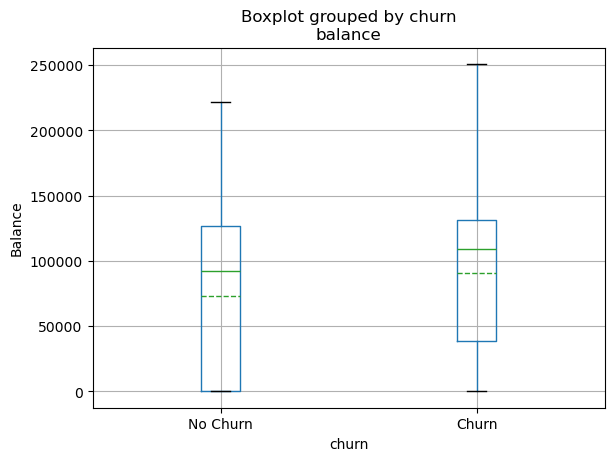

In [110]:
boxplot = df.boxplot(column="balance", by="churn", showmeans=True, meanline=True)

boxplot.set_xticklabels(["No Churn", "Churn"])
boxplot.set_ylabel("Balance")

boxplot

# AT14

Text(0.5, 1.0, 'Age vs Balance')

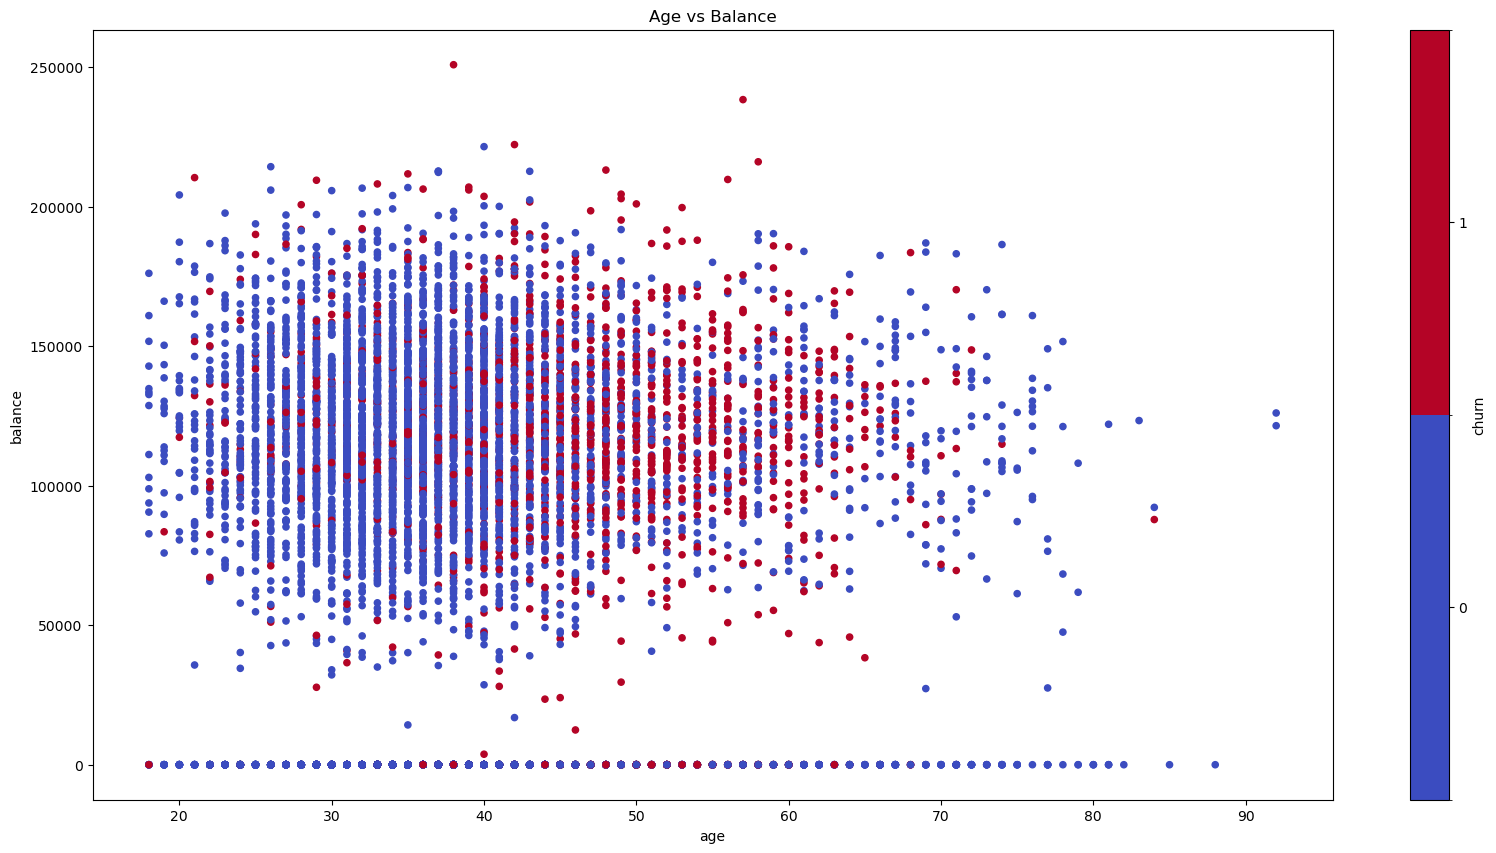

In [111]:
d = df
d["churn"] = pd.Categorical(d['churn'])
d.plot.scatter(x="age", y="balance", c="churn", colormap="coolwarm", figsize=[20,10]).set_title("Age vs Balance")

# AT15

## Gender Analysis

In [112]:
df["gender"].value_counts()

gender
Male      5451
Female    4535
-            4
M            3
male         2
F            2
female       2
Name: count, dtype: int64

## Cleaning

In [113]:
df.loc[df["gender"] == "F", "gender"] = "Female"
df.loc[df["gender"] == "female", "gender"] = "Female"

df.loc[df["gender"] == "M", "gender"] = "Male"
df.loc[df["gender"] == "male", "gender"] = "Male"

df["gender"].value_counts()

gender
Male      5456
Female    4539
-            4
Name: count, dtype: int64

In [114]:
df.loc[df["gender"] == "-"]

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1611,-,15781553,760,Germany,-,49,9,91502.99,1,1.0,0,117232.90,1
1623,-,15804516,589,France,-,38,2,0.00,1,1.0,0,79915.28,0
1980,-,15775880,554,France,-,30,9,0.00,2,1.0,1,40320.30,0
1988,-,15657107,563,Spain,-,46,8,106171.68,1,1.0,0,163145.50,1


# AT16

## Analysis

In [115]:
df.describe(include="all")

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000,1.000000e+04,10000.000000,10000,9999,10000.000000,10000.000000,10000.000000,10000.000000,9997.000000,10000.000000,10000.000000,10000.0
unique,1,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,-,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,10000,NaN,NaN,5014,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7963.0
mean,NaN,1.569094e+07,650.521300,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.705512,0.515100,100090.239881,NaN
std,NaN,7.193619e+04,96.651375,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.455835,0.499797,57510.492818,NaN
min,NaN,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN
25%,NaN,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,NaN
50%,NaN,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,NaN
75%,NaN,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,NaN


## Cleaning

In [116]:
df = df.drop("num_kids", axis=1)

df = df.drop("customer_id", axis=1)

df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1
